MPS for classification tasks
=======================

In the examples below I will always allocate 30% of the dataset for testing.

I'm not specifically optimizing the learning parameters:

- `learn_rate` is always 0.05
- `batch_size` is always 10
- `epochs` is always 25

the most sensible parameter is `max_bond_d`: the longer the Mps the higher it can get, thus it is necessary to set a maximum value to avoid overfitting.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_wine

from pyautospec import DatasetMps, parallel_plot

Iris Classification
-------------------------

The classic Iris dataset.

For more info see [here](https://archive.ics.uci.edu/ml/datasets/Iris)

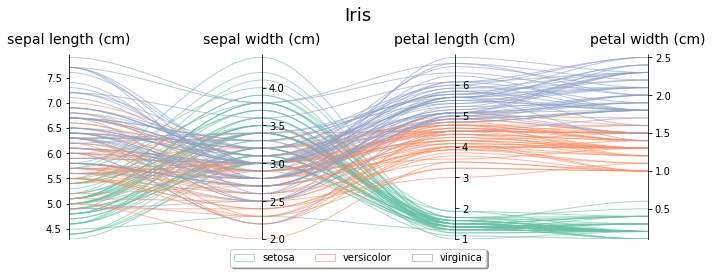

In [2]:
iris = load_iris()

X_iris, y_iris = iris.data, iris.target

parallel_plot(X_iris, y_iris, iris.feature_names, iris.target_names, title = "Iris")

In [3]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)


In [4]:
iris_mps = DatasetMps(4, x0=0.95*np.min(X_iris, axis=0), x1=1.05*np.max(X_iris, axis=0), class_n=3)

iris_mps.fit(X_iris_train, y_iris_train, learn_rate=0.05, batch_size=10, epochs = 25)

iris_mps

  0%|          | 0/25 [00:00<?, ?it/s]

epoch   10: 0.08
epoch   20: 0.07


  DatasetMps

  ╭───┐ ╭───┐       ╭─┴─┐
  │ 1 ├─┤ 2 ├─ ... ─┤  4│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
     class dim:   3
      bond dim:   6 (max: 20)
          type: classification
        

In [5]:
print("accuracy (train): {:.1f}%".format(100 * iris_mps.score(X_iris_train, y_iris_train)))
print("accuracy (test):  {:.1f}%".format(100 * iris_mps.score(X_iris_test, y_iris_test)))

accuracy (train): 94.3%
accuracy (test):  100.0%


Wine Classification
----------------------------

Each record consists in

- 13 physicochemical measurements
- the quality of the wine

For more info see [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

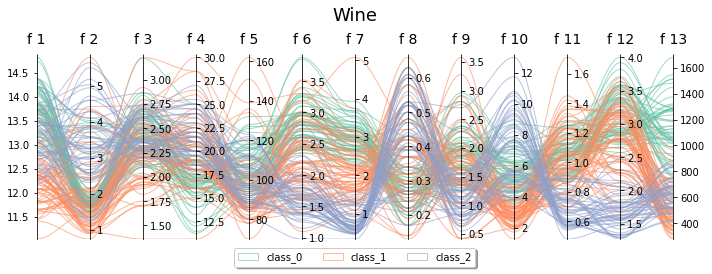

In [6]:
wine = load_wine()

X_wine, y_wine = wine.data, wine.target

parallel_plot(X_wine, y_wine, None, wine.target_names, title = "Wine")

In [7]:
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)


In [8]:
wine_mps = DatasetMps(13, x0=0.95*np.min(X_wine, axis=0), x1=1.05*np.max(X_wine, axis=0), max_bond_d=4, class_n=3)

wine_mps.fit(X_wine_train, y_wine_train, learn_rate=0.05, batch_size=10, epochs=25)

wine_mps

  0%|          | 0/25 [00:00<?, ?it/s]

epoch   10: 0.06
epoch   20: 0.05


  DatasetMps

  ╭───┐ ╭───┐       ╭─┴─┐
  │ 1 ├─┤ 2 ├─ ... ─┤ 13│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
     class dim:   3
      bond dim:   4 (max: 4)
          type: classification
        

In [9]:
print("accuracy (train): {:.1f}%".format(100 * wine_mps.score(X_wine_train, y_wine_train)))
print("accuracy (test):  {:.1f}%".format(100 * wine_mps.score(X_wine_test, y_wine_test)))

accuracy (train): 100.0%
accuracy (test):  100.0%


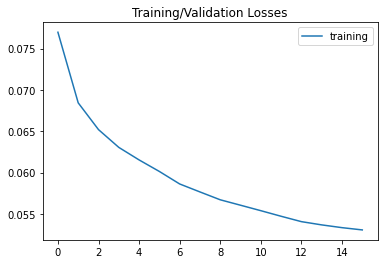

In [10]:
wine_mps.model.training_chart()

Sonar Classification
-----------------------------

Each record consists in

- 60 numbers in the range 0.0 to 1.0 representing the energy of the reflected sonar pulse at a specific angle
- the target type: mine or rock

For more info see [here](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

In [11]:
sonar = pd.read_csv("./data/sonar.csv")

sonar.columns = ["f{}".format(i) for i in range(60)] + ["T"]

y_sonar = np.array(sonar)[:,-1]
y_sonar = (y_sonar == "R").astype(int)

sonar = sonar.drop("T", axis=1)
X_sonar = np.array(sonar, dtype=np.float32)

sonar.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [12]:
X_sonar_train, X_sonar_test, y_sonar_train, y_sonar_test = train_test_split(X_sonar, y_sonar, test_size=0.3, random_state=42)


In [13]:
sonar_mps = DatasetMps(60, x0=np.zeros(60), x1=np.ones(60), max_bond_d=20, class_n=2)

sonar_mps.fit(X_sonar_train, y_sonar_train, learn_rate=0.05, batch_size=10, epochs=25)

sonar_mps

  0%|          | 0/25 [00:00<?, ?it/s]

epoch   10: 0.09
epoch   20: 0.06


  DatasetMps

  ╭───┐ ╭───┐       ╭─┴─┐
  │ 1 ├─┤ 2 ├─ ... ─┤ 60│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
     class dim:   2
      bond dim:  20 (max: 20)
          type: classification
        

In [14]:
print("accuracy (train): {:.2f}%".format(100 * sonar_mps.score(X_sonar_train, y_sonar_train)))
print("accuracy (test):  {:.2f}%".format(100 * sonar_mps.score(X_sonar_test, y_sonar_test)))

accuracy (train): 100.00%
accuracy (test):  77.78%


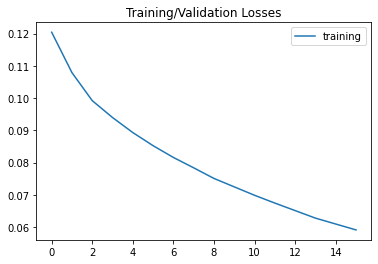

In [15]:
sonar_mps.model.training_chart()